 Objective:
“To analyze e-commerce sales data to identify sales and profit trends, top performing categories/products, regional performance, and business insights to improve profitability.”

DAY - 1 => To understand the dataset and plan the project like a real company task.

In [1]:
import pandas as pd
df = pd.read_csv('ecommerce.csv')
df.head(5)
### check the shape of the dataset
df.shape
### show the every column data type
df.dtypes

Order Date          str
Product Name        str
Category            str
Region              str
Quantity          int64
Sales             int64
Profit          float64
dtype: object

In [3]:
### use to change the datatype of column
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.dtypes

Order Date      datetime64[us]
Product Name               str
Category                   str
Region                     str
Quantity                 int64
Sales                    int64
Profit                 float64
dtype: object

In [4]:
### check if the any row is null or not 
df.isnull()


,Order Date,Product Name,Category,Region,Quantity,Sales,Profit
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
3495,False,False,False,False,False,False,False
3496,False,False,False,False,False,False,False
3497,False,False,False,False,False,False,False
3498,False,False,False,False,False,False,False


In [5]:
### check the any duplicated value is present or not
df.duplicated().sum()

np.int64(0)

KPI = key performance indicator 
Sales by Month
Profit by Month
Quantity by Month
Month-to-month comparison

In [6]:
### create a column name year
df['Year'] = df['Order Date'].dt.year

### create a column name month
df['Month'] = df['Order Date'].dt.month

### create a name of month that can fill randomly
df['Month Name'] = df['Order Date'].dt.month_name()

### create a column year-month for better analysis
df['Year-Month'] = df['Order Date'].dt.to_period('M')


In [7]:
### find the total sales 
total_sales = df['Sales'].sum()
total_sales

### find the total profit
total_profit = df['Profit'].sum()
total_profit

np.float64(1844665.21)

In [8]:
### total quantity sold
total_quantity = df['Quantity'].sum()
total_quantity

### margin of the profit 
profit_margin = ( total_profit  /  total_sales ) * 100
profit_margin
df.head(5)

,Order Date,Product Name,Category,Region,Quantity,Sales,Profit,Year,Month,Month Name,Year-Month
0,2024-12-31,Printer,Office,North,4,3640,348.93,2024,12,December,2024-12
1,2022-11-27,Mouse,Accessories,East,7,1197,106.53,2022,11,November,2022-11
2,2022-05-11,Tablet,Electronics,South,5,5865,502.73,2022,5,May,2022-05
3,2024-03-16,Mouse,Accessories,South,2,786,202.87,2024,3,March,2024-03
4,2022-09-10,Mouse,Accessories,West,1,509,103.28,2022,9,September,2022-09


In [13]:
### check the monthly KPI about of the sales , profit , and the total quantity
monthly_kpi = df.groupby('Year-Month')[['Sales','Profit','Quantity']].sum()
monthly_kpi

,Sales,Profit,Quantity
Year-Month,,,
2022-01,341544,63827.33,540
2022-02,208775,34084.90,378
2022-03,294660,51931.81,466
2022-04,230624,44260.45,421
2022-05,314295,53504.97,484
2022-06,273851,48490.93,468
2022-07,214627,40010.27,358
2022-08,296242,47551.99,498
2022-09,240211,41402.82,409


In [24]:
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')


In [25]:
df.dtypes

Order Date      datetime64[us]
Product Name               str
Category                   str
Region                     str
Quantity                 int64
Sales                    int64
Profit                 float64
Year                     int32
Month                    int32
Month Name                 str
Year-Month           period[M]
dtype: object

visualise the KPI = key performanve Indicator and we can visulise how can work and it is realate to each other

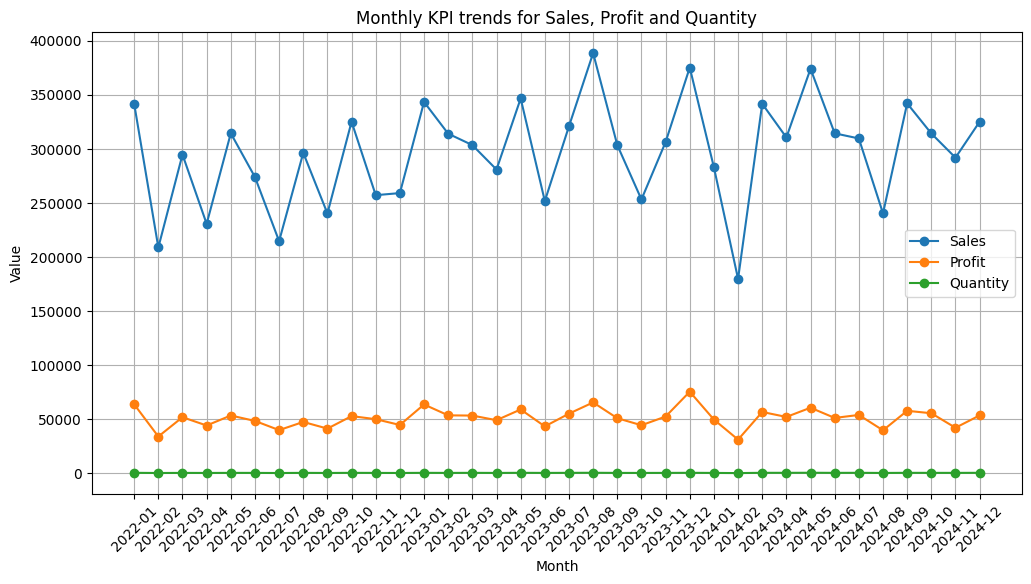

In [34]:
import matplotlib.pyplot as plt

monthly_kpi = df.groupby('Year-Month')[['Sales','Profit','Quantity']].sum().sort_index()

plt.figure(figsize=(12,6))

plt.plot(monthly_kpi.index.astype(str), monthly_kpi['Sales'], marker='o', label="Sales")
plt.plot(monthly_kpi.index.astype(str), monthly_kpi['Profit'], marker='o', label="Profit")
plt.plot(monthly_kpi.index.astype(str), monthly_kpi['Quantity'], marker='o', label="Quantity")

plt.title("Monthly KPI trends for Sales, Profit and Quantity")
plt.xlabel("Month")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()


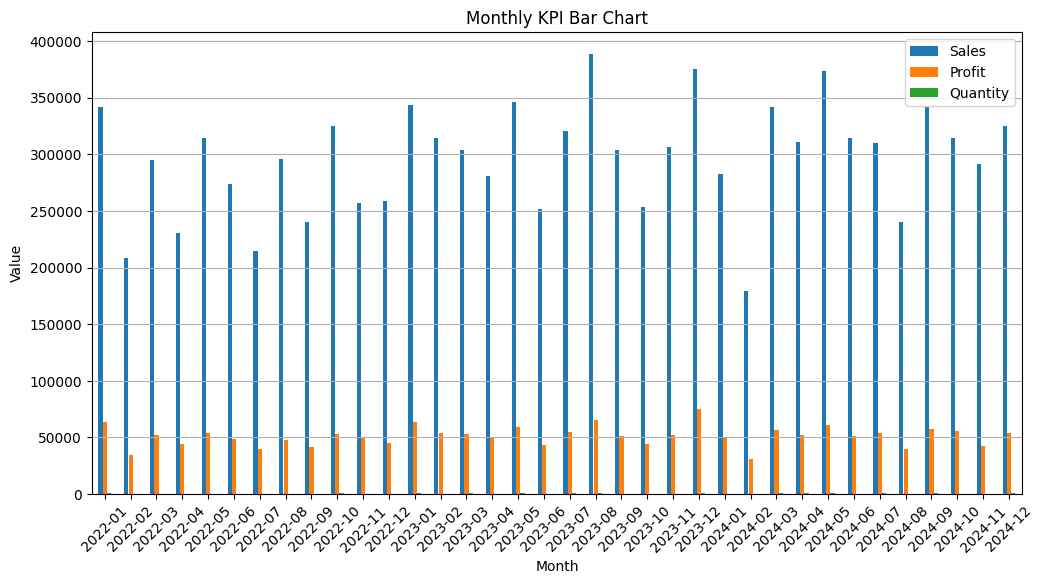

In [41]:
import matplotlib.pyplot as plt

monthly_kpi = df.groupby('Year-Month')[['Sales','Profit','Quantity']].sum().sort_index()

monthly_kpi.plot(kind='bar', figsize=(12,6))

plt.title("Monthly KPI Bar Chart")
plt.xlabel("Month")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()


go to in the deep analysis of that dataset why the profit is low and when is low 

In [44]:
df.groupby('Product Name')[['Sales','Profit','Quantity']].sum().sort_values('Profit').head(10)


,Sales,Profit,Quantity
Product Name,,,
Tablet,1023928,167505.01,1733
Headphones,988638,172478.20,1604
Keyboard,1024507,175814.68,1684
Smartwatch,1049211,178995.81,1807
Smartphone,1069681,183296.97,1617
Printer,1094216,185394.88,1734
Laptop,1005873,185756.81,1658
Mouse,1074398,185763.69,1753
Monitor,1160048,202028.17,1876


In [45]:
### sales profit acc. to the region
df.groupby('Region')[['Sales','Profit']].sum().sort_values('Profit')


,Sales,Profit
Region,,
North,2488773,426314.75
South,2659548,458103.27
East,2675110,464888.46
West,2844450,495358.73


In [46]:
### sales profit acc. to the 
df.groupby('Category')[['Sales','Profit','Quantity']].sum().sort_values('Profit')

,Sales,Profit,Quantity
Category,,,
Office,1094216,185394.88,1734
Accessories,4247591,736084.74,6917
Electronics,5326074,923185.59,8610
